In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Parte 1 Numpy

1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [7]:
array1 = np.full(1000, False, dtype=bool)
array1.nbytes
# R// el tamaño del array de 1000 elementos de tipo booleano es de 1000 bytes. 

1000

2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [9]:
array2 = np.arange(100,1,-2)
array2[-10:]

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

3) Dado el array

In [27]:
array3 = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
array3

array([[2, 4, 5, 6],
       [0, 3, 7, 4],
       [8, 8, 5, 2],
       [1, 5, 6, 1]])

In [29]:
array3[1]

array([0, 3, 7, 4])

In [38]:
array3[[0, 2]][:, [0, 2]]

array([[2, 5],
       [8, 5]])

4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [42]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

diferencia = a - b
media = np.mean(diferencia)
print(f"La media aritmética de la diferencia entre a y b es: {media}")

La media aritmética de la diferencia entre a y b es: -0.25


5) Tengo valores de cordenadas (x, y) en las columnas del array
1.33 4.5
30.0 10.7
70.2 0.5

In [67]:
array4 =np.array([[1.33, 4.5],[30.0, 10.7],[70.2, 0.5]], dtype =float)
agregar_array = np.array([37.1, -3.6])
nuevo_array4 = np.vstack([array4, agregar_array])

In [68]:
nuevo_array4.shape

(4, 2)

6) Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0).

In [103]:
transponer_array = nuevo_array4.T
transponer_array

array([[ 1.33, 30.  , 70.2 , 37.1 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ]])

In [113]:
nuevas_coordenadas = np.array([[10.8,3.0],[35.8,12.0]])
array5 = np.hstack([transponer_array,nuevas_coordenadas.T])
array5

array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ,  3.  , 12.  ]])

## Parte 2 Exploración y minería de datos

In [115]:
dataset = pd.read_csv("NucleosPoblacion.csv")
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


1) ¿Cuántos Municipios tienen más de 100,000 habitantes?

In [149]:
municipios_poblacion = dataset[dataset['Poblacion'] >= 100000]
conteo = len(municipios_poblacion)
print(f"R// Hay {conteo} municipios con una poblacion mayor a 100,000 habitantes")

R// Hay 62 municipios con una poblacion mayor a 100,000 habitantes


2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:

a. ¿Cuál es la segunda ciudad más poblada?
R// La segunda ciudad más poblada es Barcelona 
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?
R// El municipio de Granada es la posición 18 en el ranking.

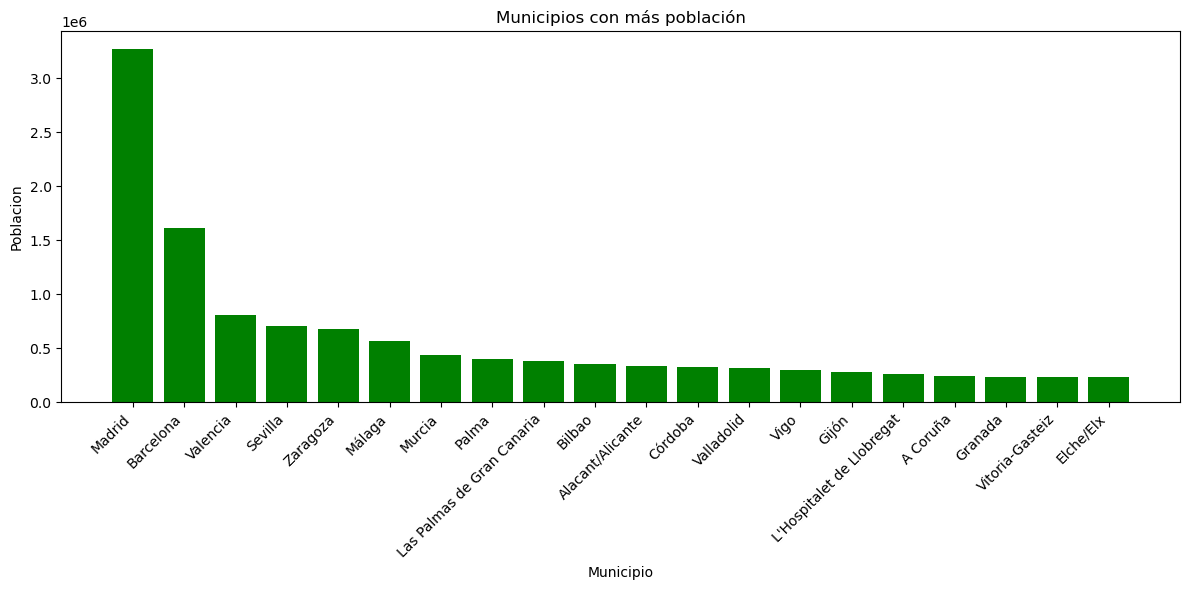

In [186]:
cantidad = dataset.sort_values('Poblacion',ascending=False).head(20)
cantidad

plt.figure(figsize=(12, 6))
plt.bar(cantidad['Municipio'], cantidad['Poblacion'], color='green', )
plt.xlabel('Municipio')
plt.ylabel('Poblacion')
plt.title('Municipios con más población')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3) ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?

In [197]:
provincia_navarra = dataset[(dataset['Poblacion'] >= 5000) & (dataset['Provincia'] == 'Navarra')]
contar= len(provincia_navarra)
print(f"R// Hay {contar} municipios de la provincia de Navarra que tienen más de 5,000 habitantes.")

R// Hay 11 municipios de la provincia de Navarra que tienen más de 5,000 habitantes.


4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). 
Proporcione también la provincia a la que pertenece y su población.

In [226]:
ciudad_norte = dataset.sort_values(by='Y', ascending=False).head(1)
x = ciudad_norte[['Municipio','Provincia','Poblacion']]
datos = np.array(x)
print(f"El municipio más al norte es {datos[0,0]} perteneciente a la provincia de {datos[0,1]} con una población de {datos[0,2]}")

El municipio más al norte es Viveiro perteneciente a la provincia de Lugo con una población de 16211.0


5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [233]:
provincia_granada = dataset[(dataset['Provincia'] == 'Granada')]

media = provincia_granada['Poblacion'].mean()
print(f"La media de habitantes de los municipios de la provincia de Granada es: {media}")

mediana = provincia_granada['Poblacion'].median()
print(f"La mediana de habitantes de los municipios de la provincia de Granada es: {mediana}")

desv_est = provincia_granada['Poblacion'].std()
print(f"La desviación estándar de habitantes de los municipios de la provincia de Granada es: {desv_est}")

maximo = provincia_granada['Poblacion'].max()
print(f"El valor maximo de habitantes de los municipios de la provincia de Granada es: {maximo}")

minimo = provincia_granada['Poblacion'].min()
print(f"El valor minimo de habitantes de los municipios de la provincia de Granada es: {minimo}")

La media de habitantes de los municipios de la provincia de Granada es: 30217.85
La mediana de habitantes de los municipios de la provincia de Granada es: 17526.0
La desviación estándar de habitantes de los municipios de la provincia de Granada es: 50355.49171459277
El valor maximo de habitantes de los municipios de la provincia de Granada es: 239154.0
El valor minimo de habitantes de los municipios de la provincia de Granada es: 10386.0


6) Realice un histograma con la población de los Municipios para cada una de las provincias.

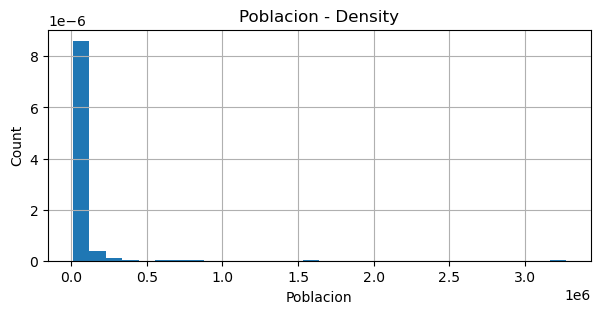

In [243]:
plt.figure(figsize=(7,3))
dataset['Poblacion'].hist(bins=30, density=True)
plt.title("Poblacion - Density")
plt.xlabel("Poblacion")
plt.ylabel("Count")
plt.show()

7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [286]:
muestra = dataset.loc[np.random.randint(0, len(dataset['Municipio'].unique()), 50), ['Poblacion', 'Municipio']]
len(muestra['Municipio'].unique())

50

In [287]:
media_muestra = muestra['Poblacion'].mean()
print(f"La media de la población de los municipios seleccionados es: {media_muestra}")

desv_muestra = muestra['Poblacion'].std()
print(f"La desviación estándar de la población de los municipios seleccionados es: {desv_muestra}")

La media de la población de los municipios seleccionados es: 30017.92
La desviación estándar de la población de los municipios seleccionados es: 32493.386844182845


8) Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [340]:
dataset2 = dataset.drop(index = 355)
x_madrid = -3.703797076
y_madrid = 40.4166300011

In [341]:
dataset2['Distancia'] = np.sqrt((dataset2['X'] - x_madrid)**2 + (dataset2['Y'] - y_madrid)**2)

In [346]:
lejano = dataset2.sort_values(by='Distancia', ascending=False).head(1)
municipio_lejano = np.array(lejano[['Municipio','Provincia']])

cercano = dataset2.sort_values(by='Distancia', ascending=True).head(1)
municipio_cercano = np.array(cercano[['Municipio','Provincia']])

print(f"El municipio más lejano al municipio de Madrid es {municipio_lejano[0,0]} en la provincia de {municipio_lejano[0,1]}")
print(f"El municipio más cercano al municipio de Madrid es {municipio_cercano[0,0]} en la provincia de {municipio_cercano[0,1]}")

El municipio más lejano al municipio de Madrid es Los Llanos de Aridane en la provincia de Santa Cruz de Tenerife
El municipio más cercano al municipio de Madrid es Pozuelo de Alarcón en la provincia de Madrid
